# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev1 toc-item"><a href="#General-Map-Configuration" data-toc-modified-id="General-Map-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General Map Configuration</a></div><div class="lev2 toc-item"><a href="#Choose-map-server" data-toc-modified-id="Choose-map-server-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Choose map server</a></div><div class="lev2 toc-item"><a href="#Map-Limits" data-toc-modified-id="Map-Limits-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Map Limits</a></div><div class="lev3 toc-item"><a href="#Common-Functions" data-toc-modified-id="Common-Functions-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Common Functions</a></div><div class="lev1 toc-item"><a href="#Base-Algorithm" data-toc-modified-id="Base-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Base Algorithm</a></div><div class="lev1 toc-item"><a href="#Given-Cities-Coordinates" data-toc-modified-id="Given-Cities-Coordinates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Given Cities Coordinates</a></div><div class="lev2 toc-item"><a href="#Generate-Matrix" data-toc-modified-id="Generate-Matrix-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generate Matrix</a></div><div class="lev2 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev3 toc-item"><a href="#Using-Basemap" data-toc-modified-id="Using-Basemap-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Using Basemap</a></div><div class="lev3 toc-item"><a href="#Using-Smopy-(OpenStreetMap)" data-toc-modified-id="Using-Smopy-(OpenStreetMap)-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Using Smopy (OpenStreetMap)</a></div><div class="lev1 toc-item"><a href="#Using-distance-matrix" data-toc-modified-id="Using-distance-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using distance matrix</a></div><div class="lev2 toc-item"><a href="#Greedy" data-toc-modified-id="Greedy-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Greedy</a></div><div class="lev2 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev3 toc-item"><a href="#Using-Basemap" data-toc-modified-id="Using-Basemap-521"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Using Basemap</a></div><div class="lev3 toc-item"><a href="#Using-Smopy-(OpenStreetMap)" data-toc-modified-id="Using-Smopy-(OpenStreetMap)-522"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Using Smopy (OpenStreetMap)</a></div><div class="lev1 toc-item"><a href="#Using-Google-Maps-API-(NOT-WORKING)" data-toc-modified-id="Using-Google-Maps-API-(NOT-WORKING)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using Google Maps API (NOT WORKING)</a></div><div class="lev2 toc-item"><a href="#Using-Basemap" data-toc-modified-id="Using-Basemap-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Using Basemap</a></div><div class="lev2 toc-item"><a href="#Using-Smopy-(OpenStreetMap)" data-toc-modified-id="Using-Smopy-(OpenStreetMap)-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Using Smopy (OpenStreetMap)</a></div><div class="lev1 toc-item"><a href="#Using-Custom-Route" data-toc-modified-id="Using-Custom-Route-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Using Custom Route</a></div><div class="lev2 toc-item"><a href="#Using-Basemap" data-toc-modified-id="Using-Basemap-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Using Basemap</a></div><div class="lev2 toc-item"><a href="#Using-Smopy-(OpenStreetMap)-with-Coordinates" data-toc-modified-id="Using-Smopy-(OpenStreetMap)-with-Coordinates-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Using Smopy (OpenStreetMap) with Coordinates</a></div>

# Initialization

In [1]:
# Basic Imports
from pylab import rcParams
import matplotlib.pyplot as plt
import timeit

# Greedy Imports
from math import sin, cos, sqrt, atan2, radians
import itertools

# Smopy Imports
import smopy

# Basemap Imports
from mpl_toolkits.basemap import Basemap

# Jupyter Configuration
%matplotlib inline
rcParams['figure.figsize'] = (30,30)

# General Map Configuration

## Choose map server

In [2]:
# smopy.TILE_SERVER = "http://b.tile.openstreetmap.org/{z}/{x}/{y}.png"
# "https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png"
# "http://a.tile.stamen.com/toner/{z}/{x}/{y}.png"
# "http://a.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png"
# "http://a.tile.thunderforest.com/landscape/{z}/{x}/{y}.png"
# "http://c.tile.stamen.com/watercolor/{z}/{x}/{y}.jpg"
# "http://b.tile.openstreetmap.org/{z}/{x}/{y}.jpg"

## Map Limits

In [3]:
northermost_lat = -21
southernmost_lat = -56
eastermost_long = -53
westermost_long = -75

### Common Functions

In [4]:
def get_vertexes(cities, conversion_func, inverse=False):
    """Convert cities into vertexes groups"""
    vertexes = []
    for city in cities:
        lat, lon = provinces[city]
        if inverse:
            vertex = conversion_func(lon, lat)
        else:
            vertex = conversion_func(lat, lon)
        vertexes.append(vertex)
    return vertexes

def plot_lines_from_vertexes(vertexes, my_map):
    """Plot lines between vertexes"""
    for i in range(len(vertexes)-1):
        x1, y1 = vertexes[i]
        x2, y2 = vertexes[i+1]
        my_map.plot([x1, x2], [y1, y2], color='m', linestyle='-', linewidth=1.5, marker='o')

# Base Algorithm

In [5]:
def main_greedy(matrix, cities):
    start_time = timeit.default_timer()
    
    distancia = None
    for city in cities:
        distancia_alt, route_alt = greedy(matrix, cities, city)
        if distancia is None or distancia_alt < distancia:
            distancia = distancia_alt
            route = route_alt

    total_time = timeit.default_timer() - start_time

    return total_time, route[0], distancia, route

def greedy(matrix, cities, initial_city):
    total_distance = 0
    remaining_cities = {city:matrix[i] for i, city in enumerate(cities)}
    next_city = initial_city
    route = [next_city]
    while len(route) != len(cities):
        row = remaining_cities.pop(next_city)
        min_distance = min(i for i in row if i > 0 and cities[row.index(i)] not in route)
        index = row.index(min_distance)
        next_city = cities[index]
        total_distance += min_distance
        route.append(next_city)
    total_distance += calc_distance_beetween_cities(route[-1], initial_city)
    return (total_distance, route)

def show(time, best_city, distancia, route):
    print("Ciudad Inicial: {}".format(best_city))
    print("Distancia Total: {}".format(distancia))
    print("Ruta: {}".format(", ".join(route)))
    print("Tiempo de ejecucion: {0:.6f}".format(time))

# Given Cities Coordinates

In [6]:
provinces = {
    #"rosario":(-32.95, -60.65),
    #"la_plata":(-34.933333, -57.95),
    "Buenos Aires":(-34.599722, -58.381944),
    "Córdoba":(-31.416667, -64.183333),
    "S. F. del valle de Catamarca":(-28.468611, -65.779167),
    "Resistencia":(-27.451389, -58.986667),
    "Rawson":(-43.3, -65.1),
    "Corrientes":(-27.483333, -58.816667),
    "Paraná":(-31.744444, -60.5175),
    "Formosa":(-26.184722, -58.175833),
    "San S. de Jujuy":(-24.185556, -65.299444),
    "Santa Rosa":(-36.620278, -64.290556),
    "La Rioja":(-29.413056, -66.855833),
    "Mendoza":(-32.883333, -68.833333),
    "Posadas":(-27.366667, -55.896944),
    "Neuquén":(-38.95735, -68.045533),
    "Viedma":(-40.8, -63),
    "Salta":(-24.788333, -65.410556),
    "San Juan":(-31.5375, -68.536389),
    "San Luis":(-33.277222, -66.3525),
    "Rio Gallegos":(-51.633333, -69.233333),
    "Santa Fe":(-31.633333, -60.7),
    "Sgo. del Estero":(-27.784444, -64.266944),
    "Ushuaia":(-54.807222, -68.304444),
    "S. M. de Tucumán":(-26.816667, -65.216667),
}

## Generate Matrix

In [7]:
def coord_to_matrix(coords):
    matrix = []

    for city_coords in coords:
        row = []
        for city_coords_ in coords:
            distance = calc_distance(*city_coords, *city_coords_)
            row.append(distance)
        matrix.append(row)
    
    return matrix

def calc_distance_beetween_cities(city1, city2):
    return calc_distance(*provinces[city1], *provinces[city2])

def calc_distance(lat1, lon1, lat2, lon2):
    return calc_distance_harversine(lat1, lon1, lat2, lon2)

def calc_distance_harversine(_lat1, _lon1, _lat2, _lon2):
    """ Use of Haversine Algorithm"""
    
    R = 6373.0
    lat1 = radians(_lat1)
    lon1 = radians(_lon1)
    lat2 = radians(_lat2)
    lon2 = radians(_lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return int(R * c)

cities = sorted(i for i in provinces.keys())
coords = [provinces[i] for i in cities]
matrix = coord_to_matrix(coords)

## Plotting

### Using Basemap

Ciudad Inicial: Neuquén
Distancia Total: 9303
Ruta: Neuquén, Santa Rosa, San Luis, Mendoza, San Juan, La Rioja, S. F. del valle de Catamarca, Sgo. del Estero, S. M. de Tucumán, Salta, San S. de Jujuy, Resistencia, Corrientes, Formosa, Posadas, Paraná, Santa Fe, Córdoba, Buenos Aires, Viedma, Rawson, Rio Gallegos, Ushuaia
Tiempo de ejecucion: 0.015603


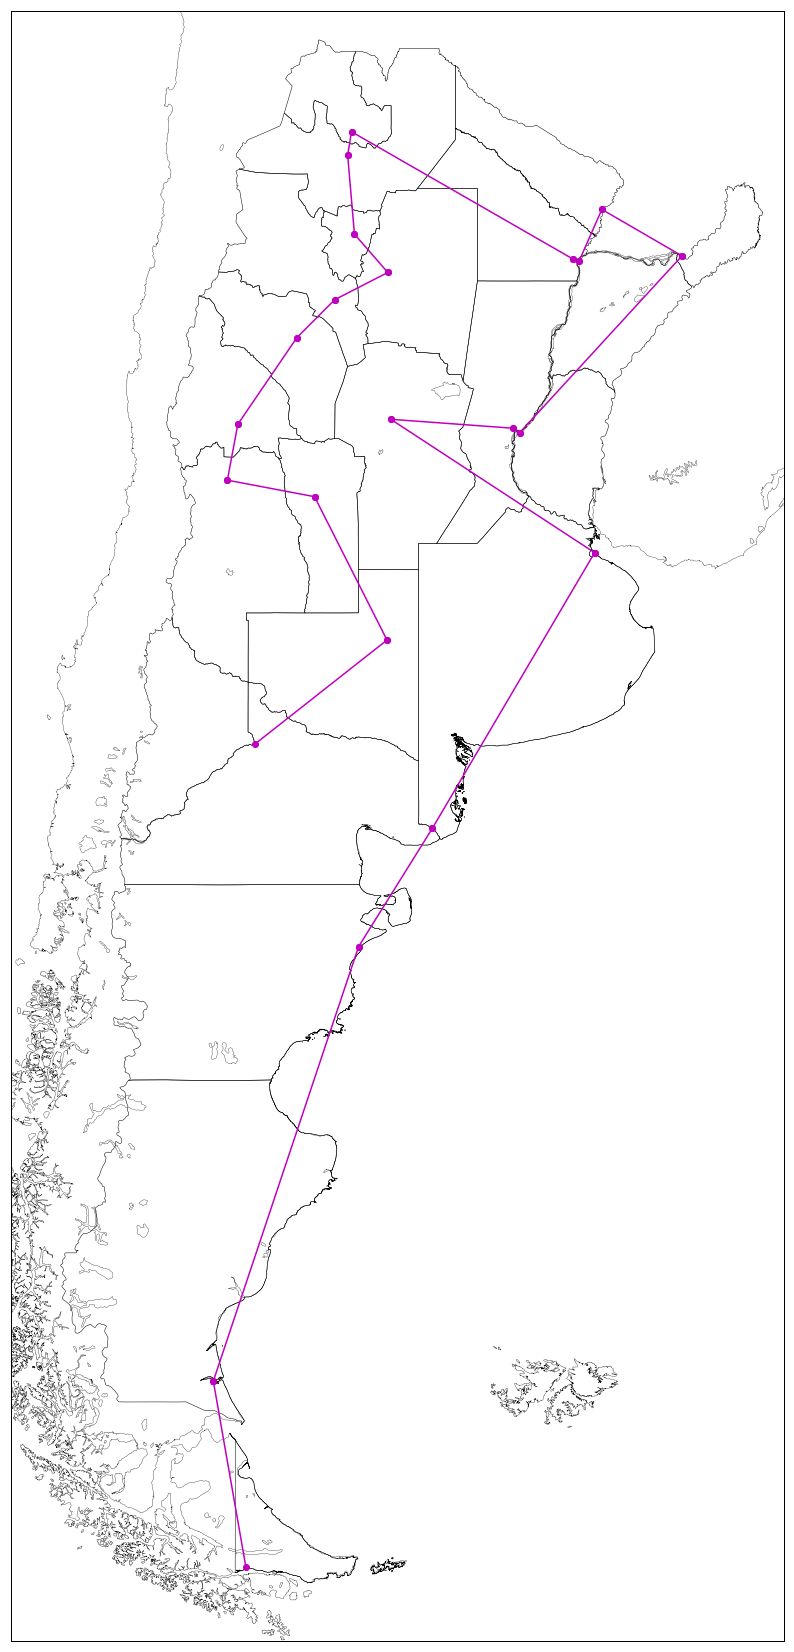

In [8]:
my_map = Basemap(projection='merc', resolution = 'h', area_thresh = 10.0,
    llcrnrlon=westermost_long, llcrnrlat=southernmost_lat,
    urcrnrlon=eastermost_long, urcrnrlat=northermost_lat)

my_map.readshapefile("shapes\ARG_adm1", "cities")
my_map.drawcoastlines(linewidth=0.3)
my_map.drawmapboundary()

time, best_city, distancia, route = main_greedy(matrix, cities)
show(time, best_city, distancia, route)

vertexes = get_vertexes(route, my_map, inverse=True)

plot_lines_from_vertexes(vertexes, my_map)

plt.show()

### Using Smopy (OpenStreetMap)

Lowered zoom level to keep map size reasonable. (z = 5)
Ciudad Inicial: Neuquén
Distancia Total: 9303
Ruta: Neuquén, Santa Rosa, San Luis, Mendoza, San Juan, La Rioja, S. F. del valle de Catamarca, Sgo. del Estero, S. M. de Tucumán, Salta, San S. de Jujuy, Resistencia, Corrientes, Formosa, Posadas, Paraná, Santa Fe, Córdoba, Buenos Aires, Viedma, Rawson, Rio Gallegos, Ushuaia
Tiempo de ejecucion: 0.014559


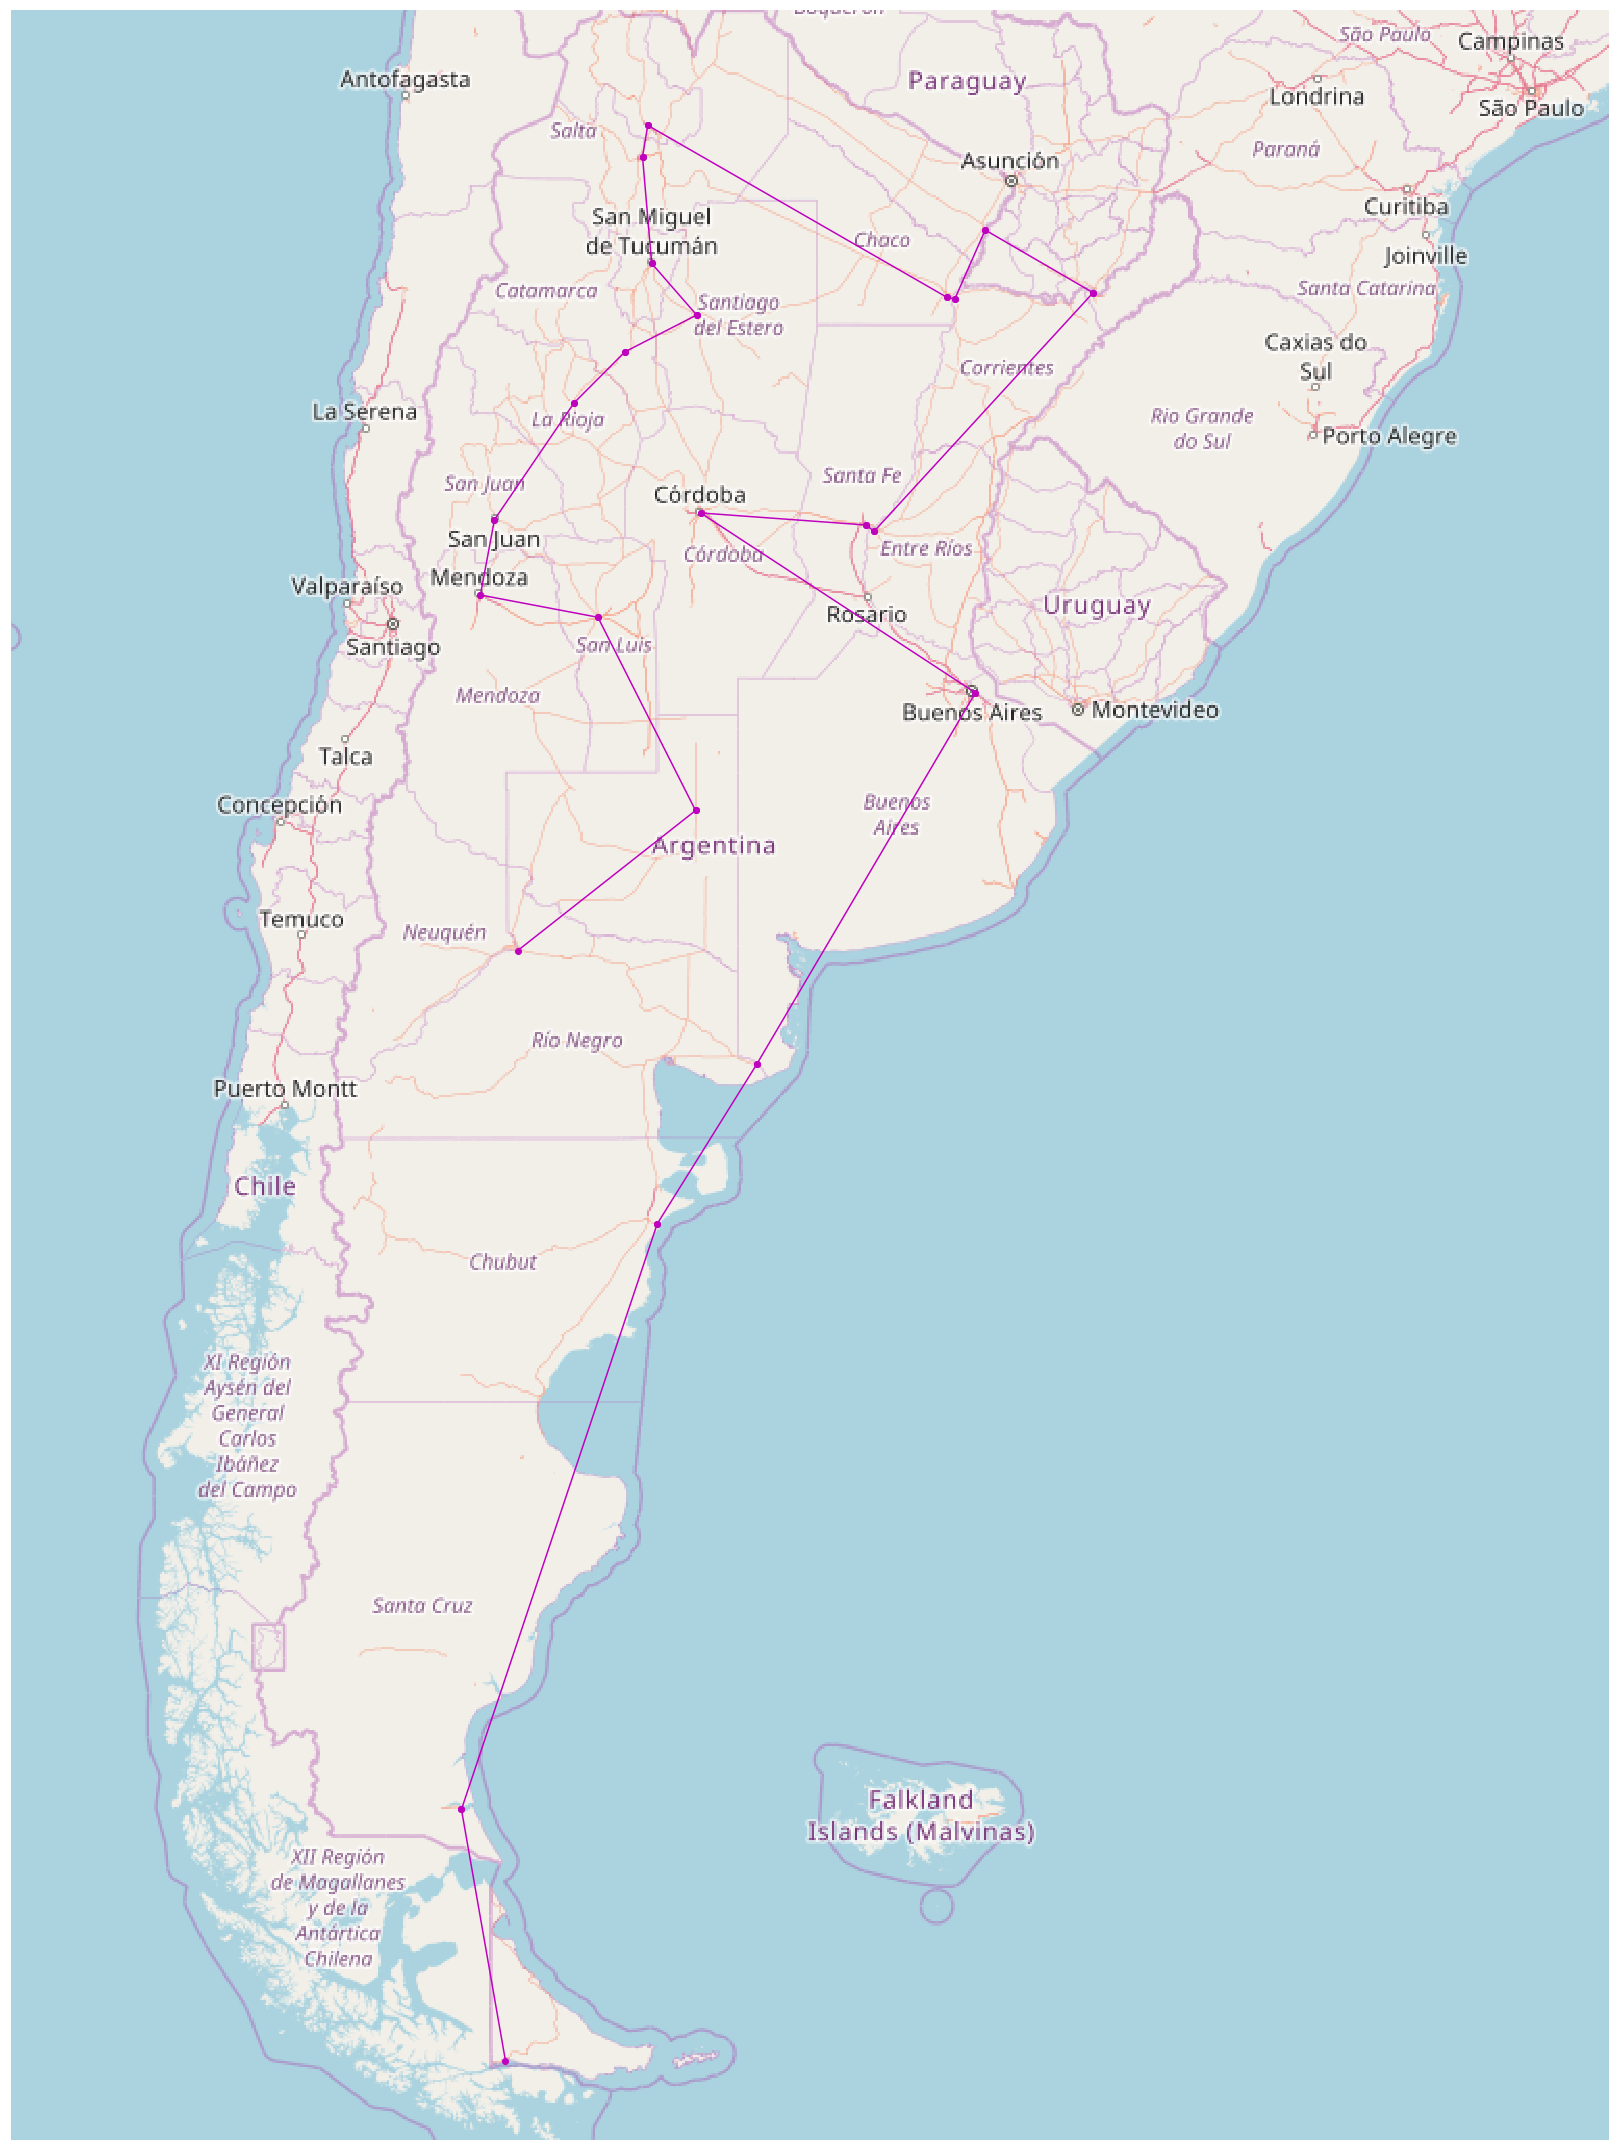

In [9]:
map = smopy.Map(southernmost_lat+6, westermost_long, northermost_lat-3, eastermost_long-4)

my_map = map.show_mpl()
    
time, best_city, distancia, route = main_greedy(matrix, cities)
show(time, best_city, distancia, route)

vertexes = get_vertexes(route, map.to_pixels)

plot_lines_from_vertexes(vertexes, my_map)

plt.show()

https://maps.googleapis.com/maps/api/distancematrix/json?origins=-32.95,-60.666667&destinations=-34.603333,-58.381667

# Using distance matrix

In [10]:
distance_matrix = [ [0, 1543, 1510, 1203, 1043, 1191, 1023, 478, 940, 1040, 480, 715, 1150, 1110, 790, 1155, 1050, 620, 1158, 960, 1455, 2635, 3228],
 [1543, 0, 99, 340, 500, 960, 860, 1107, 883, 1198, 1138, 930, 770, 1220, 1320, 572, 1345, 1530, 2200, 2124, 2385, 3565, 4158],
 [1510, 99, 0, 307, 467, 948, 780, 1074, 803, 1118, 1105, 897, 695, 1145, 1245, 539, 1227, 1497, 2082, 2091, 2352, 3532, 4125],
 [1203, 340, 307, 0, 160, 936, 768, 767, 791, 1106, 798, 590, 338, 838, 938, 232, 1005, 1190, 1860, 1784, 2045, 3225, 3818],
 [1043, 500, 467, 160, 0, 776, 610, 607, 633, 948, 638, 430, 360, 810, 850, 212, 977, 1030, 1567, 1624, 1885, 3065, 3658],
 [1191, 960, 948, 936, 776, 0, 168, 713, 191, 506, 744, 1043, 1136, 1543, 1463, 988, 1710, 1523, 2060, 2117, 2378, 3558, 4151],
 [1023, 860, 780, 765, 610, 168, 0, 545, 23, 338, 576, 875, 970, 1420, 1295, 822, 1587, 1475, 2012, 2069, 2210, 3390, 3983],
 [478, 1107, 1074, 767, 607, 713, 545, 0, 568, 883, 31, 330, 765, 830, 625, 770, 885, 810, 1347, 1404, 1665, 2845, 3438],
 [940, 883, 803, 791, 633, 191, 23, 568, 0, 315, 590, 898, 993, 1398, 1318, 845, 1565, 1378, 1989, 2046, 2187, 3367, 3960],
 [1040, 1198, 1118, 1106, 948, 506, 338, 883, 315, 0, 820, 1213, 1308, 1758, 1633, 1160, 1925, 1660, 2198, 2000, 2495, 3675, 4268],
 [480, 1138, 1105, 798, 638, 744, 576, 31, 590, 820, 0, 361, 796, 861, 656, 801, 916, 841, 1378, 1435, 1696, 2876, 3469],
 [715, 930, 897, 590, 430, 1043, 875, 330, 898, 1213, 361, 0, 435, 500, 420, 440, 670, 600, 1137, 1194, 1455, 3635, 3228],
 [1150, 770, 695, 388, 360, 1136, 970, 765, 993, 1308, 796, 435, 0, 450, 550, 156, 617, 1035, 1472, 1629, 1890, 3070, 3663],
 [1110, 1220, 1145, 838, 810, 1543, 1420, 830, 1398, 1758, 861, 500, 450, 0, 320, 606, 167, 825, 1022, 1419, 1680, 2860, 3453],
 [790, 1320, 1245, 938, 850, 1463, 1295, 625, 1318, 1633, 656, 420, 550, 320, 0, 705, 260, 505, 883, 1099, 1360, 2540, 3133],
 [1145, 572, 539, 232, 212, 988, 822, 770, 845, 1160, 801, 440, 156, 606, 705, 0, 773, 1040, 1588, 1634, 1895, 3075, 3668],
 [1050, 1345, 1227, 1005, 977, 1710, 1587, 885, 1565, 1925, 916, 670, 617, 167, 260, 773, 0, 765, 855, 1359, 1620, 2800, 3393],
 [620, 1530, 1497, 1190, 1030, 1523, 1475, 810, 1378, 1660, 841, 600, 1035, 825, 505, 1040, 765, 0, 537, 594, 855, 2035, 2628],
 [1158, 2200, 2082, 1860, 1567, 2060, 2012, 1347, 1989, 2198, 1378, 1137, 1472, 1022, 883, 1588, 855, 537, 0, 660, 750, 1930, 2523],
 [960, 2124, 2091, 1784, 1624, 2117, 2069, 1404, 2046, 2000, 1435, 1194, 1629, 1419, 1099, 1634, 1359, 594, 660, 0, 495, 1675, 2268],
 [1455, 2385, 2352, 2045, 1885, 2378, 2210, 1665, 2187, 2495, 1696, 1455, 1890, 1680, 1360, 1895, 1620, 855, 750, 495, 0, 1180, 1773],
 [2635, 3565, 3532, 3225, 3065, 3558, 3390, 2845, 3367, 3675, 2876, 2635, 3070, 2860, 2540, 3075, 2800, 2035, 1930, 1675, 1180, 0, 593],
 [3228, 4158, 4125, 3818, 3658, 4151, 3983, 3438, 3960, 4268, 3469, 3228, 3660, 3453, 3133, 3668, 3393, 2628, 2523, 2268, 1773, 593, 0]]

In [11]:
cities_alt = ["Buenos Aires",
            "San S. de Jujuy",
            "Salta",
            "S. M. de Tucumán",
            "Sgo. del Estero",
            "Formosa",
            "Resistencia",
            "Santa Fe",
            "Corrientes",
            "Posadas",
            "Paraná",
            "Córdoba",
            "La Rioja",
            "San Juan",
            "San Luis",
            "S. F. del valle de Catamarca",
            "Mendoza",
            "Santa Rosa",
            "Neuquén",
            "Viedma",
            "Rawson",
            "Rio Gallegos",
            "Ushuaia"]

## Greedy

In [12]:
def main_greedy_matrix(matrix, cities):
    start_time = timeit.default_timer()
    
    distancia = None
    for city in cities:
        distancia_alt, route_alt = greedy_matrix(matrix, cities, city)
        if distancia is None or distancia_alt < distancia:
            distancia = distancia_alt
            route = route_alt

    total_time = timeit.default_timer() - start_time

    return total_time, route[0], distancia, route

def greedy_matrix(matrix, cities, initial_city):
    total_distance = 0
    remaining_cities = {city:matrix[i] for i, city in enumerate(cities)}
    next_city = initial_city
    route = [next_city]
    while len(route) != len(cities):
        row = remaining_cities.pop(next_city)
        min_distance = min(i for i in row if i > 0 and cities[row.index(i)] not in route)
        index = row.index(min_distance)
        next_city = cities[index]
        total_distance += min_distance
        route.append(next_city)
    total_distance += calc_distance_beetween_cities_matrix(route[-1], initial_city)
    return (total_distance, route)

def show(time, best_city, distancia, route):
    print("Ciudad Inicial: {}".format(best_city))
    print("Distancia Total: {}".format(distancia))
    print("Ruta: {}".format(", ".join(route)))
    print("Tiempo de ejecucion: {0:.6f}".format(time))
    
def calc_distance_beetween_cities_matrix(city1, city2):
    index1 = cities_alt.index(city1)
    index2 = cities_alt.index(city2)
    return distance_matrix[index1][index2]

## Plotting

### Using Basemap

Ciudad Inicial: Neuquén
Distancia Total: 12080
Ruta: Neuquén, Santa Rosa, San Luis, Mendoza, San Juan, La Rioja, S. F. del valle de Catamarca, Sgo. del Estero, S. M. de Tucumán, Salta, San S. de Jujuy, Resistencia, Corrientes, Formosa, Posadas, Paraná, Santa Fe, Córdoba, Buenos Aires, Viedma, Rawson, Rio Gallegos, Ushuaia
Tiempo de ejecucion: 0.018678


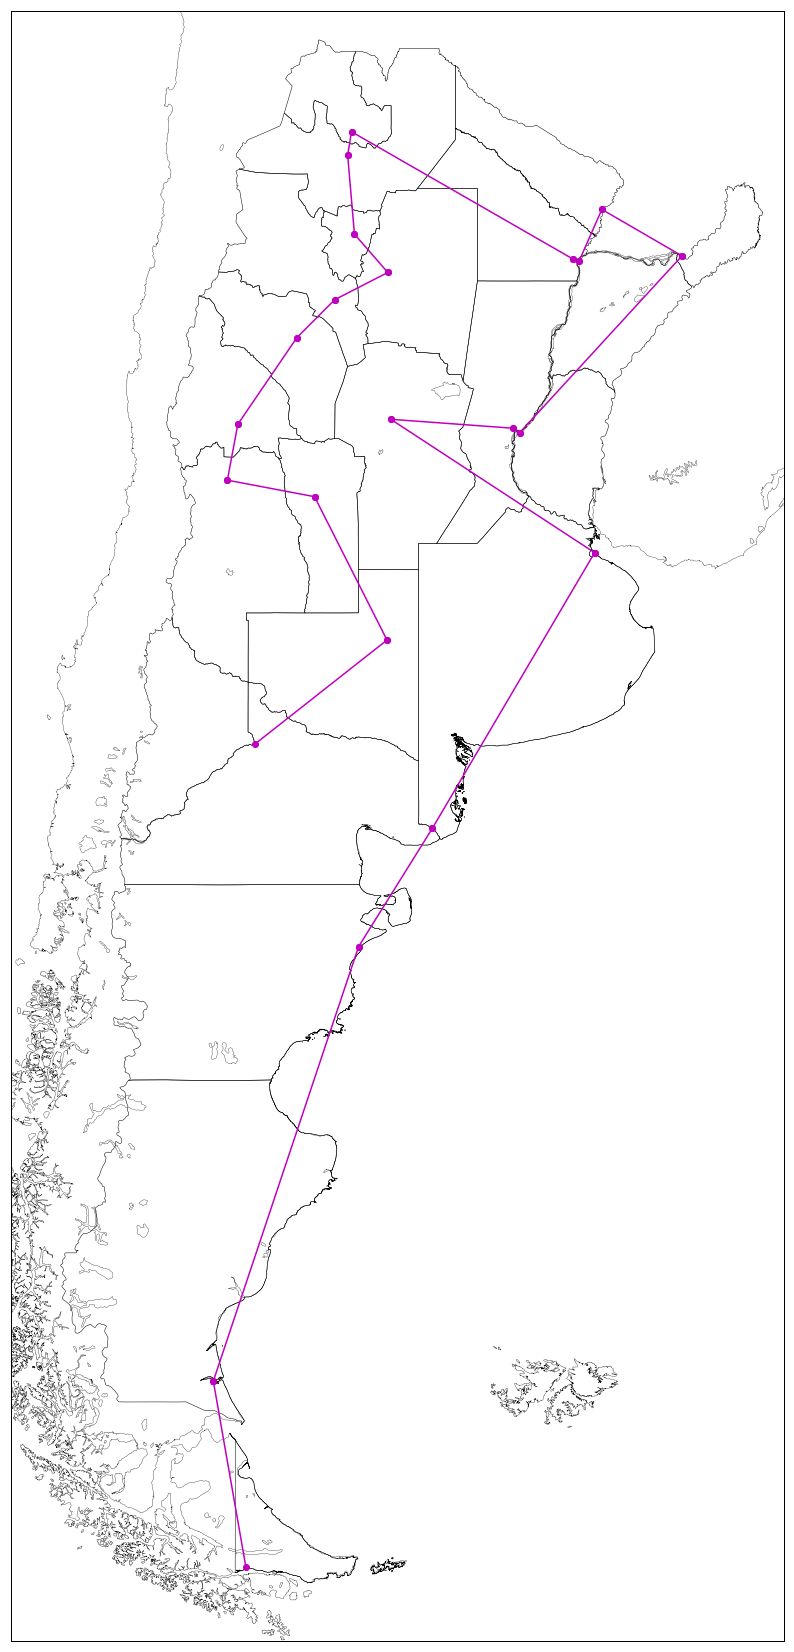

In [35]:
my_map = Basemap(projection='merc', resolution = 'h', area_thresh = 10.0,
    llcrnrlon=westermost_long, llcrnrlat=southernmost_lat,
    urcrnrlon=eastermost_long, urcrnrlat=northermost_lat)

my_map.readshapefile("shapes\ARG_adm1", "cities")
my_map.drawcoastlines(linewidth=0.3)
my_map.drawmapboundary()

time, best_city, distancia, route = main_greedy_matrix(distance_matrix, cities_alt)
show(time, best_city, distancia, route)

vertexes = get_vertexes(route, my_map, inverse=True)

plot_lines_from_vertexes(vertexes, my_map)

plt.savefig("Greedy Enunciado22.png")

plt.show()

### Using Smopy (OpenStreetMap)

Lowered zoom level to keep map size reasonable. (z = 5)
Ciudad Inicial: Neuquén
Distancia Total: 12080
Ruta: Neuquén, Santa Rosa, San Luis, Mendoza, San Juan, La Rioja, S. F. del valle de Catamarca, Sgo. del Estero, S. M. de Tucumán, Salta, San S. de Jujuy, Resistencia, Corrientes, Formosa, Posadas, Paraná, Santa Fe, Córdoba, Buenos Aires, Viedma, Rawson, Rio Gallegos, Ushuaia
Tiempo de ejecucion: 0.022798


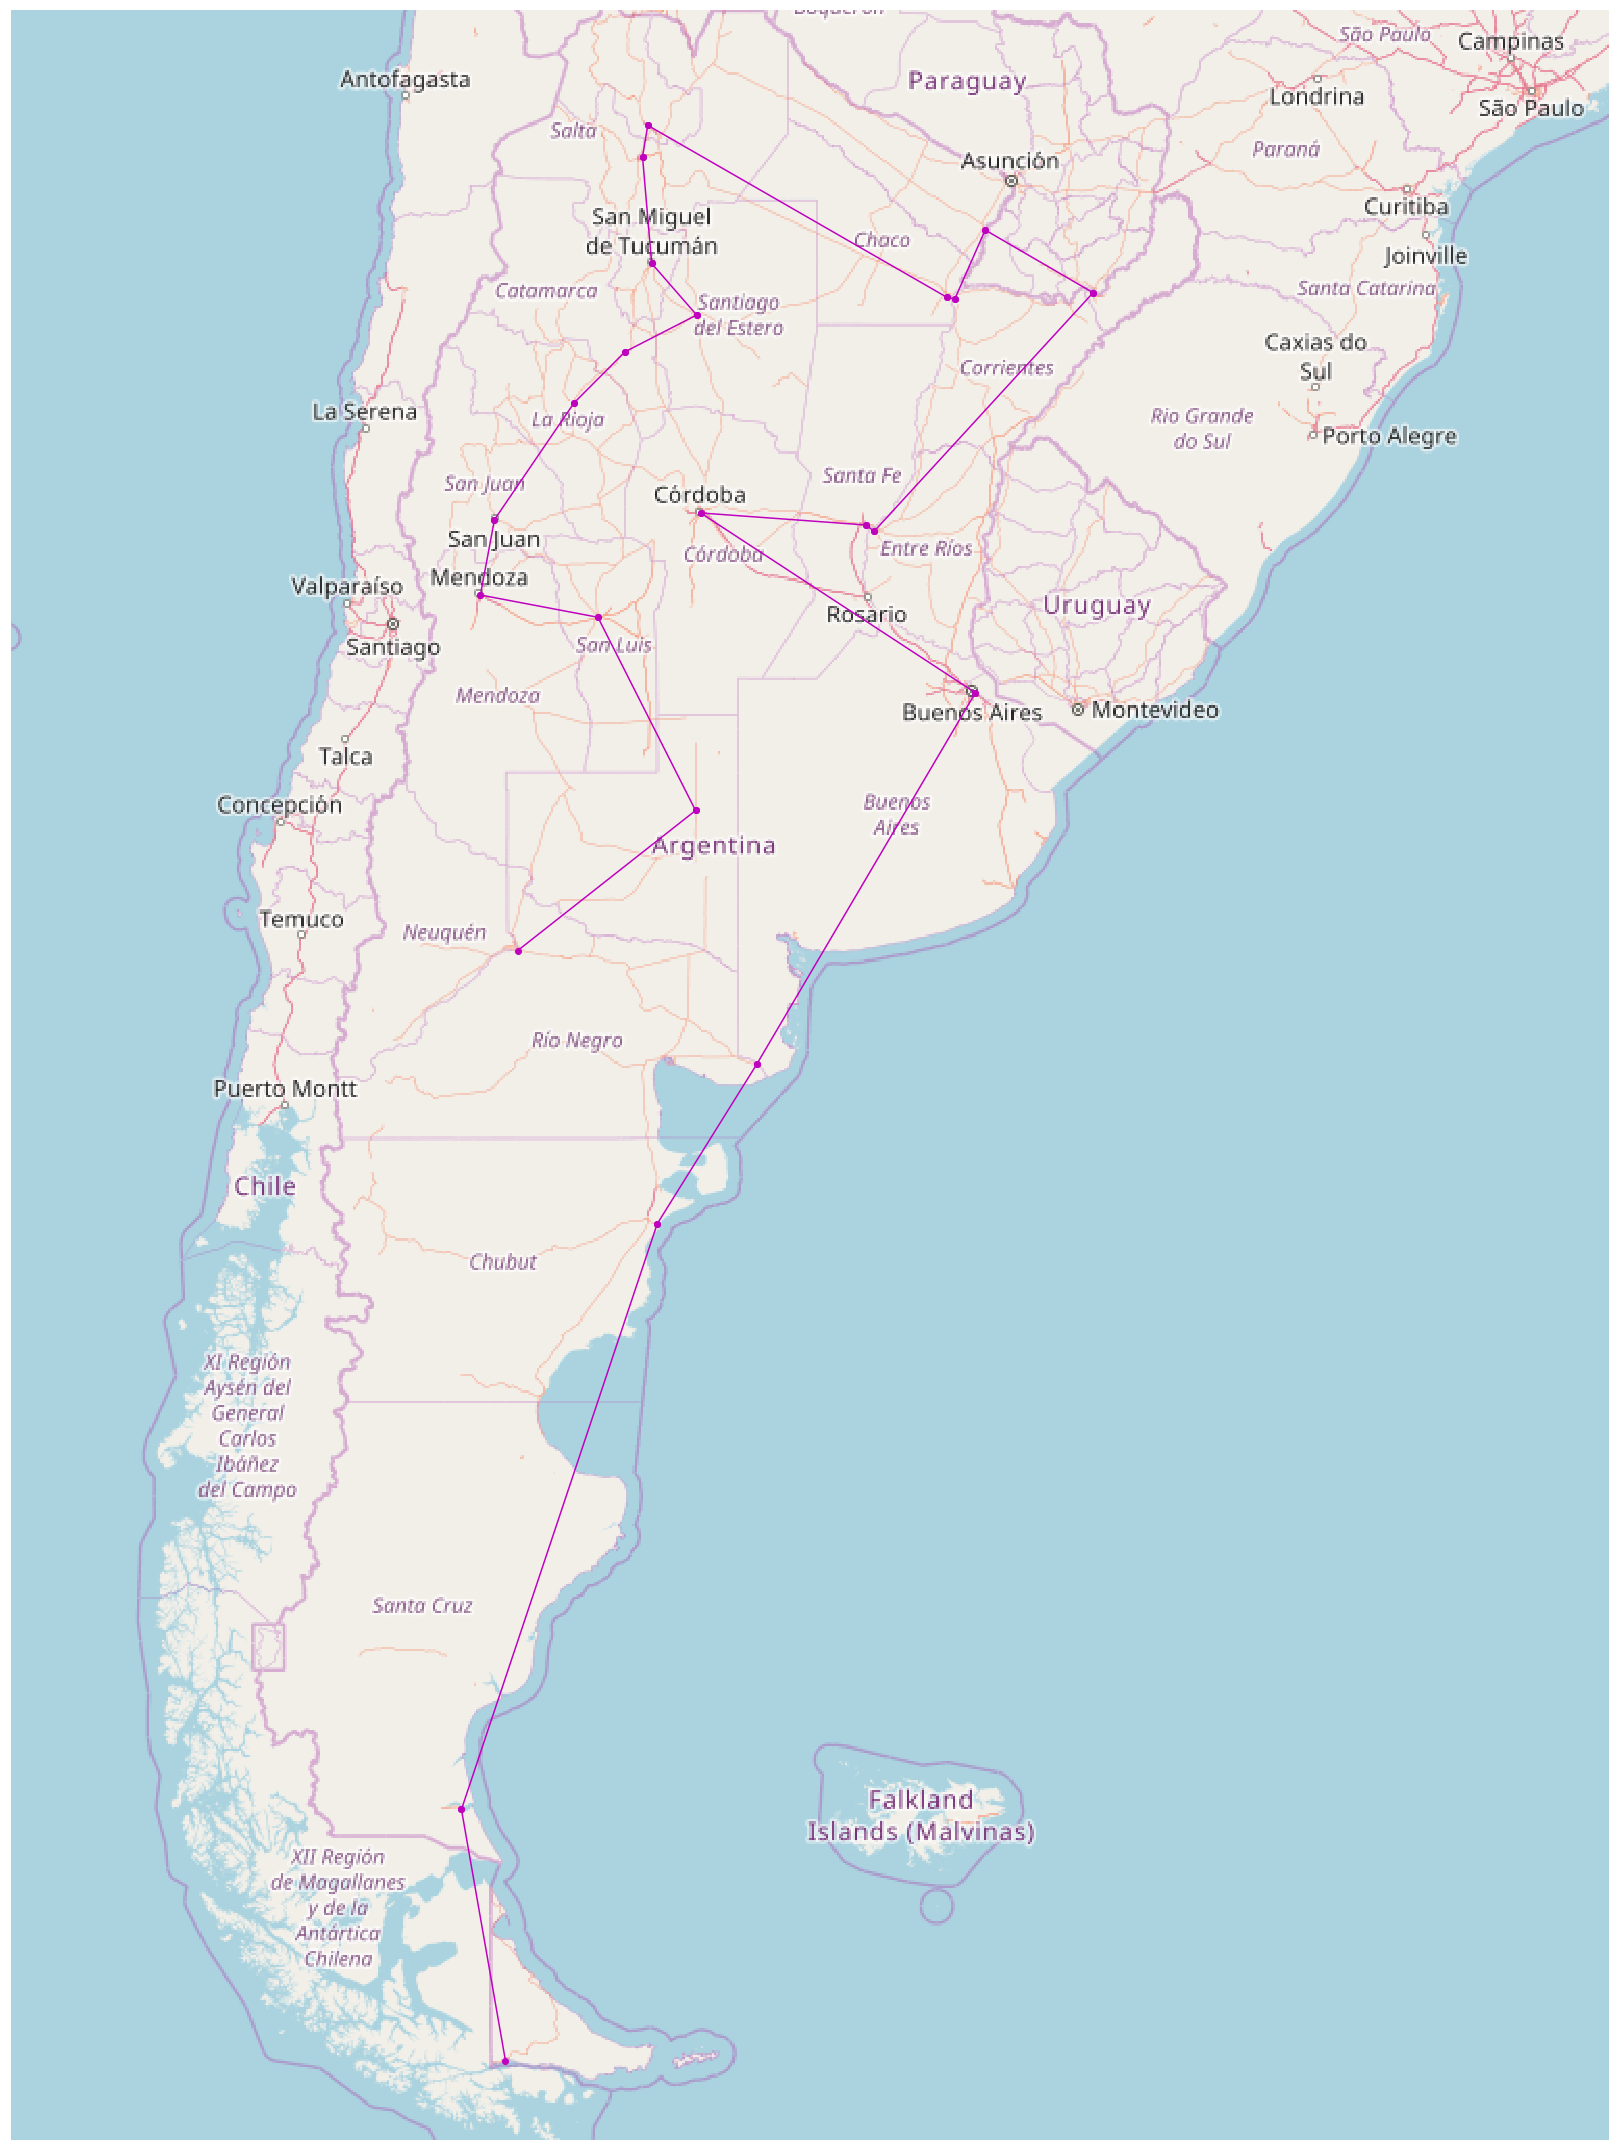

In [14]:
map = smopy.Map(southernmost_lat+6, westermost_long, northermost_lat-3, eastermost_long-4)

my_map = map.show_mpl()
    
time, best_city, distancia, route = main_greedy_matrix(distance_matrix, cities_alt)
show(time, best_city, distancia, route)

vertexes = get_vertexes(route, map.to_pixels)

plot_lines_from_vertexes(vertexes, my_map)

plt.show()

# Using Google Maps API (NOT WORKING)

In [15]:
import urllib.request, json

def get_distance_from_google_maps(lat1, lon1, lat2, lon2):
    url = "https://maps.googleapis.com/maps/api/distancematrix/"
    query_string = "json?origins={},{}&destinations={},{}".format(lat1,lon1,lat2,lon2)
    with urllib.request.urlopen(url+query_string) as url:
        data = json.loads(url.read().decode())
    distance_meters = data['rows'][0]['elements'][0]['distance']['value']
    return distance_meters / 1000

## Using Basemap

In [16]:
# my_map = Basemap(projection='merc', resolution = 'h', area_thresh = 10.0,
#     llcrnrlon=westermost_long, llcrnrlat=southernmost_lat,
#     urcrnrlon=eastermost_long, urcrnrlat=northermost_lat)

# my_map.readshapefile("shapes\ARG_adm1", "cities")
# my_map.drawcoastlines(linewidth=0.3)
# my_map.drawmapboundary()

# time, best_city, distancia, route = main_greedy(matrix, cities)
# show(time, best_city, distancia, route)

# vertexes = get_vertexes(route, my_map, inverse=True)

# plot_lines_from_vertexes(vertexes, my_map)

# plt.show()

## Using Smopy (OpenStreetMap)

In [17]:
# map = smopy.Map(southernmost_lat+6, westermost_long, northermost_lat-3, eastermost_long-4)

# my_map = map.show_mpl()
    
# time, best_city, distancia, route = main_greedy(matrix, cities)
# show(time, best_city, distancia, route)

# vertexes = get_vertexes(route, map.to_pixels)

# plot_lines_from_vertexes(vertexes, my_map)

# plt.show()

# Using Custom Route

In [50]:
cities = "Posadas, Resistencia, Formosa, Sgo. del Estero, Salta, San S. de Jujuy, S. M. de Tucumán, S. F. del valle de Catamarca, La Rioja, San Juan, Mendoza, San Luis, Córdoba, Santa Rosa, Neuquén, Rio Gallegos, Ushuaia, Rawson, Viedma, Buenos Aires, Paraná, Santa Fe, Corrientes"
route = cities.split(", ")

In [51]:
def get_distance_from_cities(cities):
    total_distance = 0
    for i in range(len(cities)-1):
        total_distance += calc_distance_beetween_cities(cities[i], cities[i+1])
    total_distance += calc_distance_beetween_cities(cities[-1], cities[0])
    return total_distance

def get_distance_from_cities_matrix(cities):
    total_distance = 0
    for i in range(len(cities)-1):
        total_distance += calc_distance_beetween_cities_matrix(cities[i], cities[i+1])
    total_distance += calc_distance_beetween_cities_matrix(cities[-1], cities[0])
    return total_distance

distancia = get_distance_from_cities(route)
distancia_matrix = get_distance_from_cities_matrix(route)

## Using Basemap

With Coordinates
Ciudad Inicial: Posadas
Distancia Total: 9482
Ruta: Posadas, Resistencia, Formosa, Sgo. del Estero, Salta, San S. de Jujuy, S. M. de Tucumán, S. F. del valle de Catamarca, La Rioja, San Juan, Mendoza, San Luis, Córdoba, Santa Rosa, Neuquén, Rio Gallegos, Ushuaia, Rawson, Viedma, Buenos Aires, Paraná, Santa Fe, Corrientes
Tiempo de ejecucion: -1.000000

 With Matrix
Ciudad Inicial: Posadas
Distancia Total: 12155
Ruta: Posadas, Resistencia, Formosa, Sgo. del Estero, Salta, San S. de Jujuy, S. M. de Tucumán, S. F. del valle de Catamarca, La Rioja, San Juan, Mendoza, San Luis, Córdoba, Santa Rosa, Neuquén, Rio Gallegos, Ushuaia, Rawson, Viedma, Buenos Aires, Paraná, Santa Fe, Corrientes
Tiempo de ejecucion: -1.000000


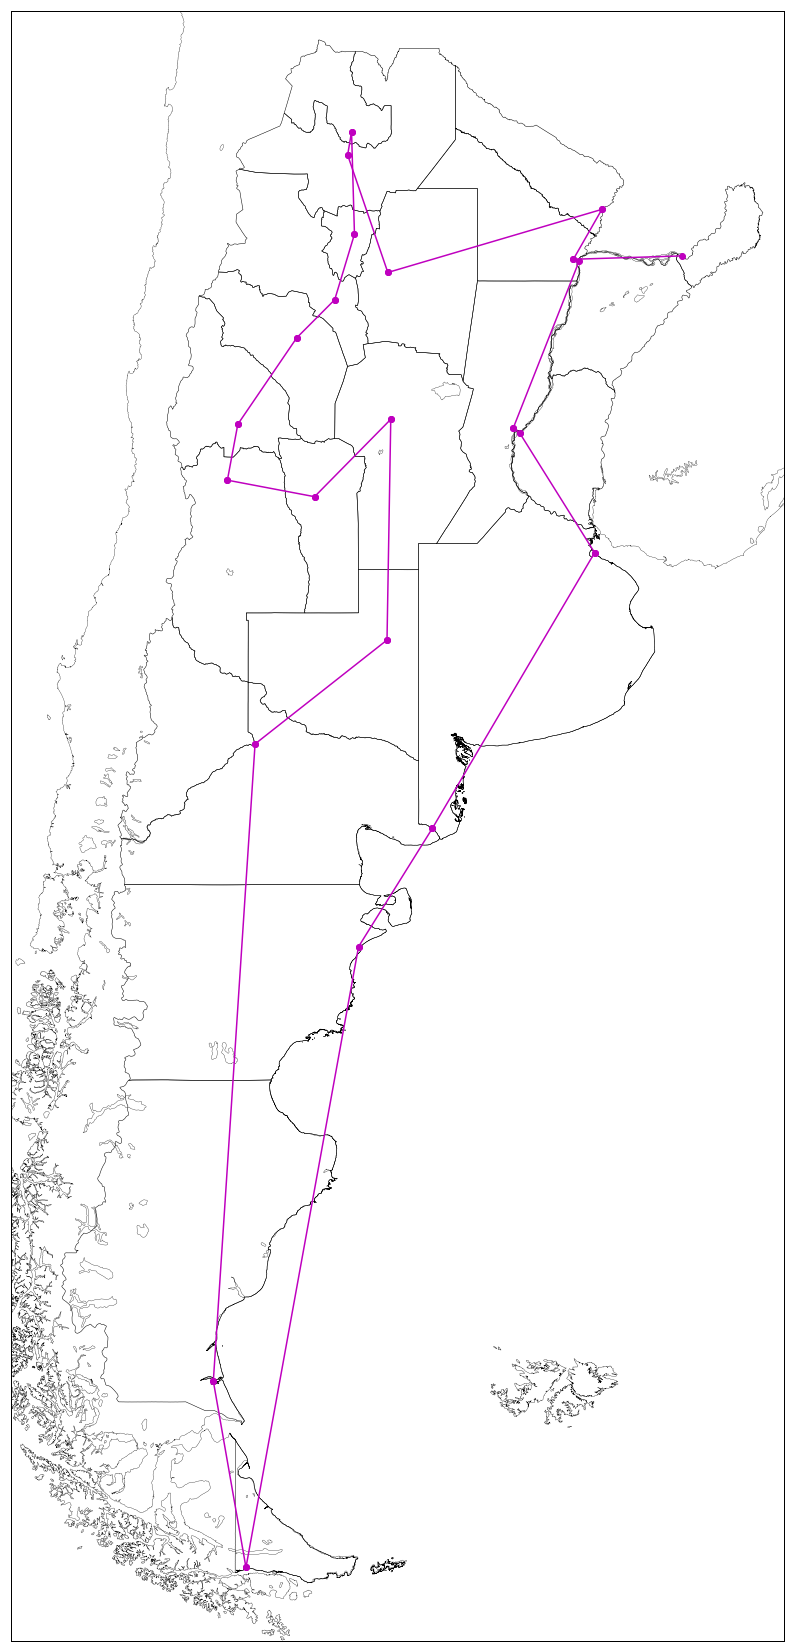

In [52]:
my_map = Basemap(projection='merc', resolution = 'h', area_thresh = 10.0,
    llcrnrlon=westermost_long, llcrnrlat=southernmost_lat,
    urcrnrlon=eastermost_long, urcrnrlat=northermost_lat)

my_map.readshapefile("shapes\ARG_adm1", "cities")
my_map.drawcoastlines(linewidth=0.3)
my_map.drawmapboundary()

print("With Coordinates")
show(-1, route[0], distancia, route)
print("\n With Matrix")
show(-1, route[0], distancia_matrix, route)

vertexes = get_vertexes(route, my_map, inverse=True)

plot_lines_from_vertexes(vertexes, my_map)

plt.savefig("Greedy Enunciado3.png")

plt.show()

## Using Smopy (OpenStreetMap) with Coordinates

Lowered zoom level to keep map size reasonable. (z = 5)
With Coordinates
Ciudad Inicial: San Juan
Distancia Total: 15156
Ruta: San Juan, Paraná, Viedma, Ushuaia, Rio Gallegos, Neuquén, San Luis, Buenos Aires, Santa Fe, Posadas, Corrientes, Resistencia, Rawson, Santa Rosa, Sgo. del Estero, Salta, S. M. de Tucumán, San S. de Jujuy, Formosa, Córdoba, La Rioja, S. F. del valle de Catamarca, Mendoza
Tiempo de ejecucion: -1.000000

 With Matrix
Ciudad Inicial: San Juan
Distancia Total: 19202
Ruta: San Juan, Paraná, Viedma, Ushuaia, Rio Gallegos, Neuquén, San Luis, Buenos Aires, Santa Fe, Posadas, Corrientes, Resistencia, Rawson, Santa Rosa, Sgo. del Estero, Salta, S. M. de Tucumán, San S. de Jujuy, Formosa, Córdoba, La Rioja, S. F. del valle de Catamarca, Mendoza
Tiempo de ejecucion: -1.000000


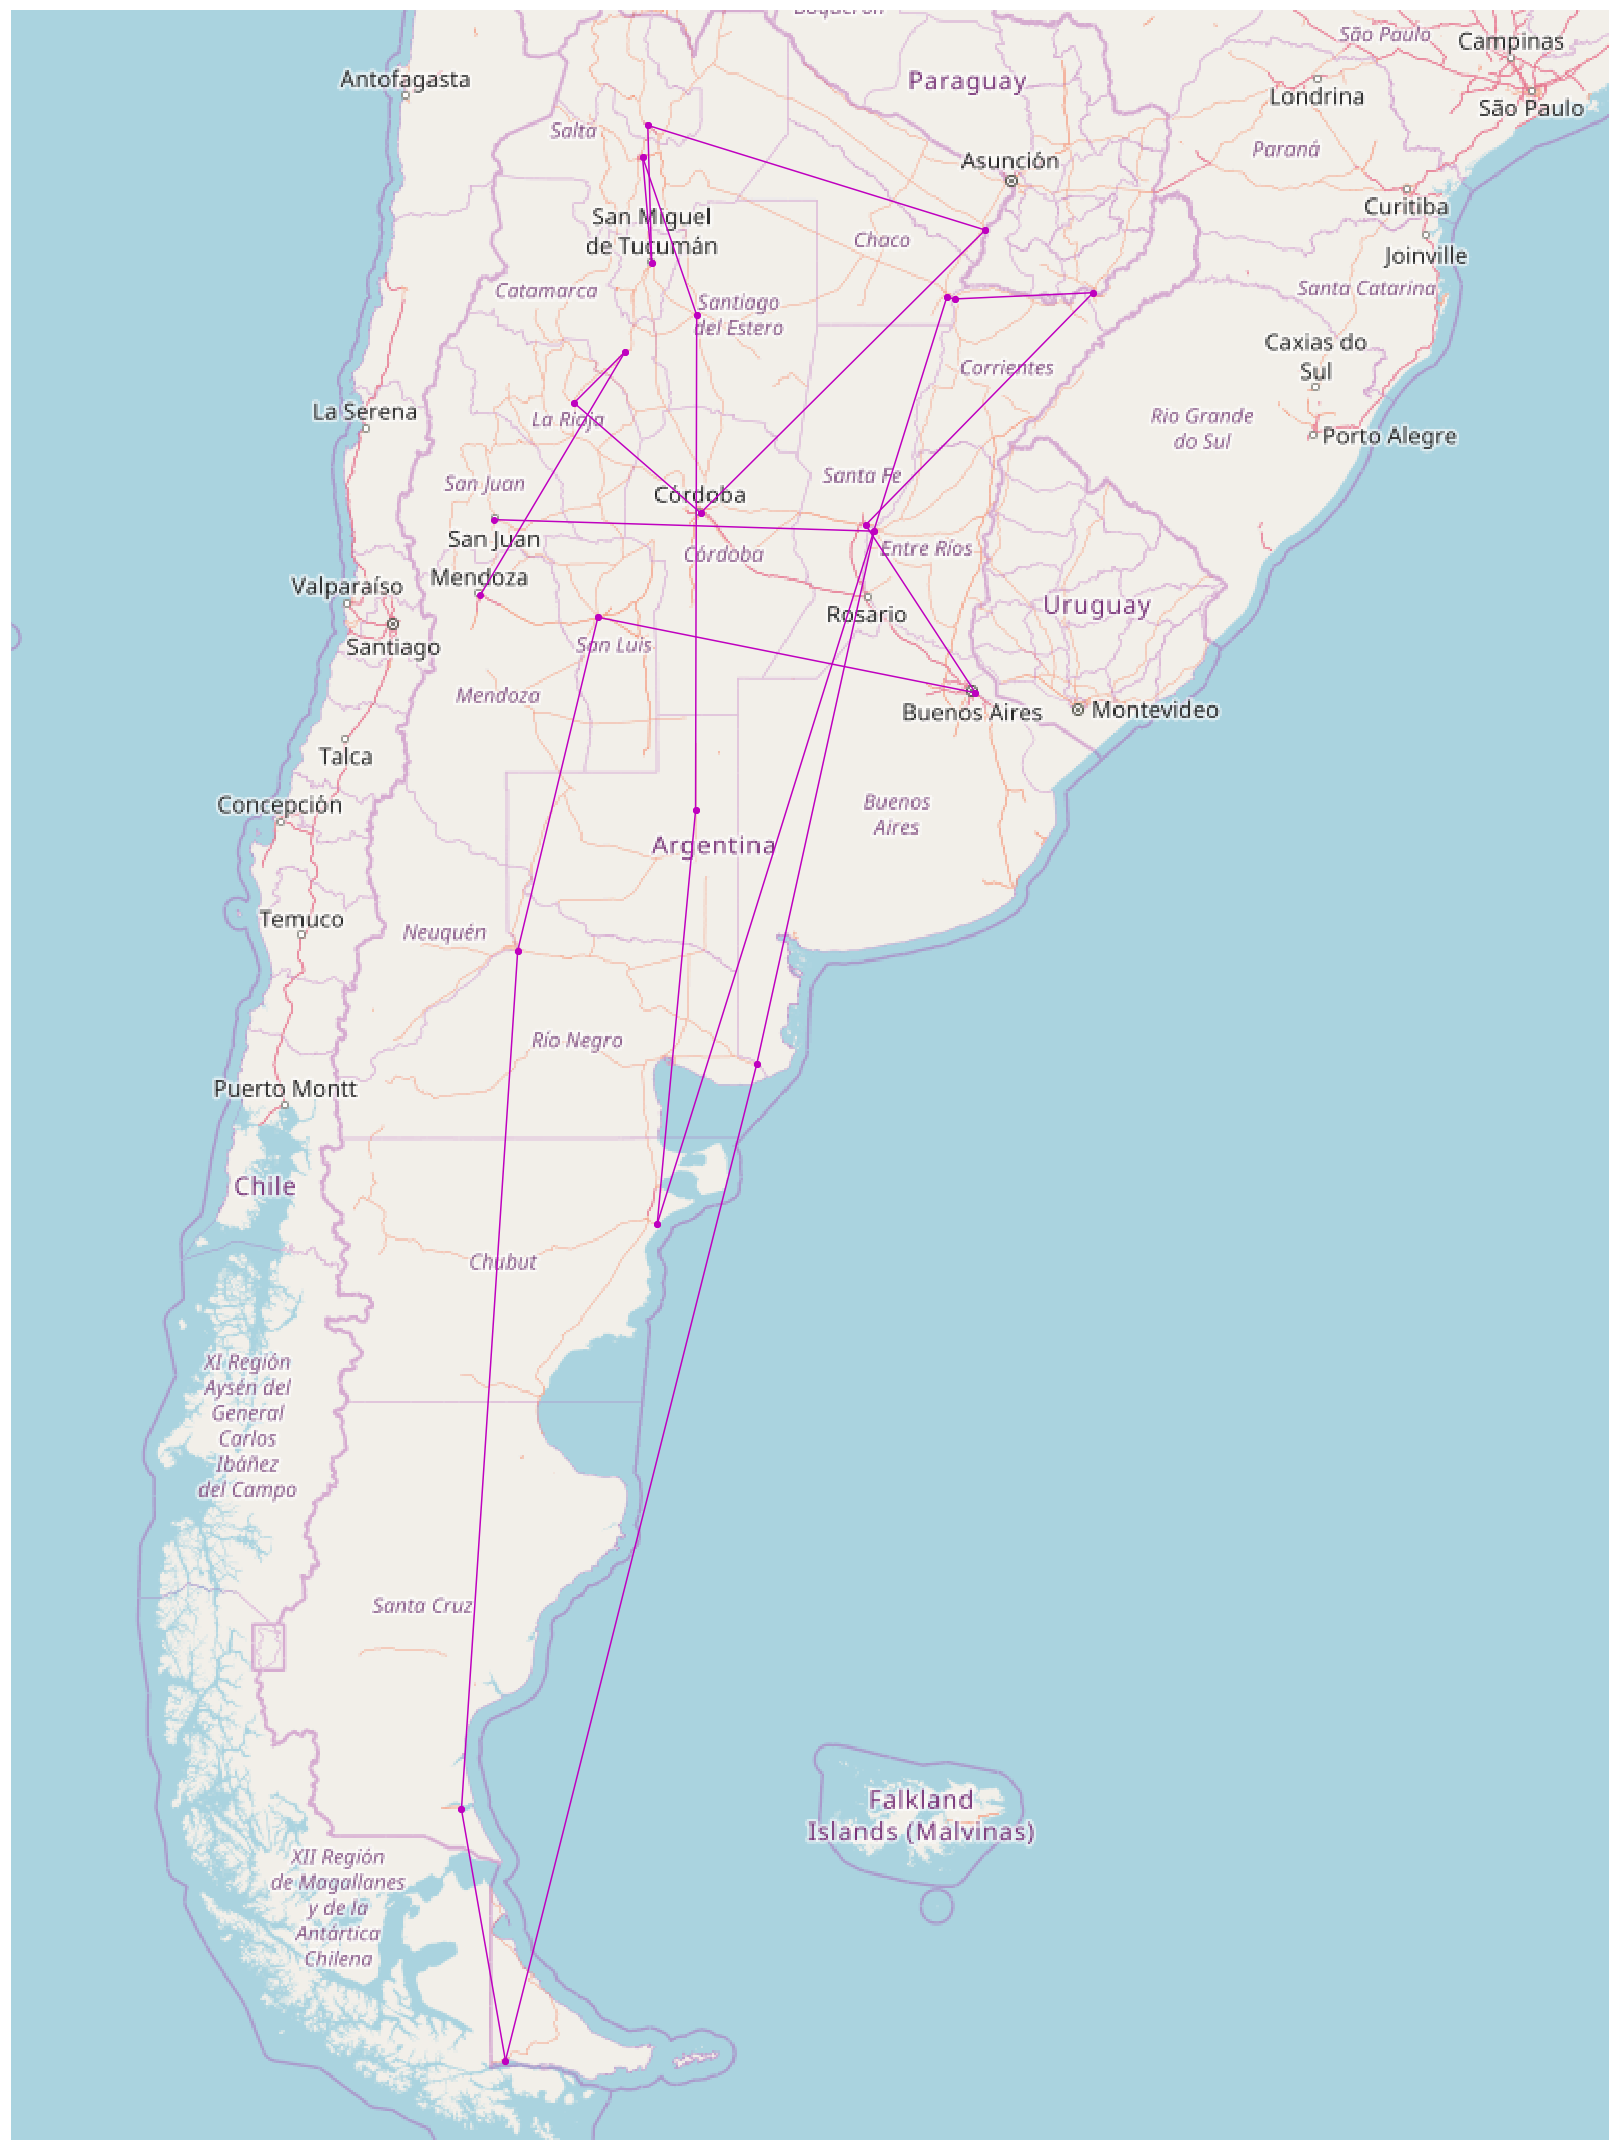

In [32]:
map = smopy.Map(southernmost_lat+6, westermost_long, northermost_lat-3, eastermost_long-4)

my_map = map.show_mpl()

print("With Coordinates")
show(-1, route[0], distancia, route)
print("\n With Matrix")
show(-1, route[0], distancia_matrix, route)

vertexes = get_vertexes(route, map.to_pixels)

plot_lines_from_vertexes(vertexes, my_map)

plt.savefig("Greedy Enunciado.png")

plt.show()